In [1]:
!git clone https://github.com/Eoo0m/computer_vision.git

%cd computer_vision/filtering


Cloning into 'computer_vision'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 103 (delta 26), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 1.72 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/computer_vision/filtering



[Gaussian 필터 성능 비교]

- 이미지에 가우시안 블러를 적용하는 두 가지 방법 비교.
  1. 1D 분리형 필터
  2. 2D 전체 커널 필터

- 대상 이미지: 새, 여우, 눈사람
- 커널 크기: 13x13, 시그마: 2.0


📌 결과:
- 분리형 필터가 O(k), 2D 필터가 O(k^2)로 훨씬 빠른 성능을 보임.



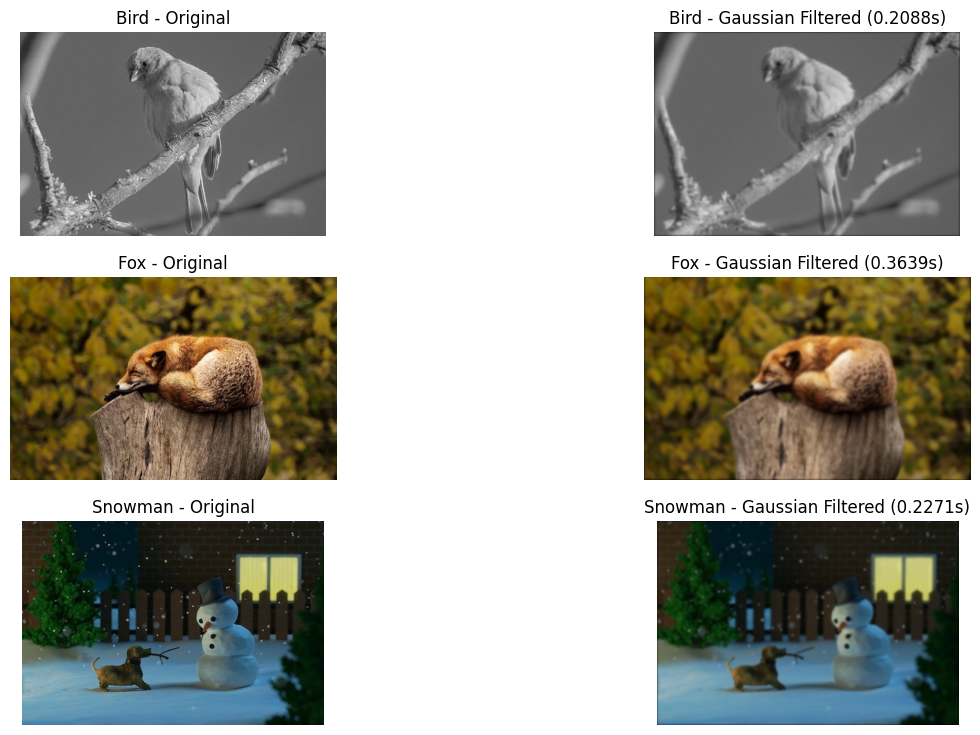

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from filter import apply_gaussian_filter_separable


image1 = cv2.imread('src/bird_clean.jpg')
image2 = cv2.imread('src/fox_clean.jpg')
image3 = cv2.imread('src/snowman_clean.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

images = [image1, image2, image3]
names = ['Bird', 'Fox', 'Snowman']
filtered_images = []
times = []

kernel_size = 13
sigma = 2.0

'''
분리형 가우시안 커널 적용 전, 후 이미지 + 적용 시간
'''
for idx, img in enumerate(images):
    start = time.time()
    result = apply_gaussian_filter_separable(img, kernel_size, sigma)
    elapsed = time.time() - start
    filtered_images.append(result)
    times.append(elapsed)

plt.figure(figsize=(15, 9))

for i in range(3):
    # Original
    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(images[i])
    plt.title(f"{names[i]} - Original")
    plt.axis('off')

    # Filtered
    plt.subplot(3, 2, 2*i + 2)
    plt.imshow(filtered_images[i])
    plt.title(f"{names[i]} - Gaussian Filtered ({times[i]:.4f}s)")
    plt.axis('off')


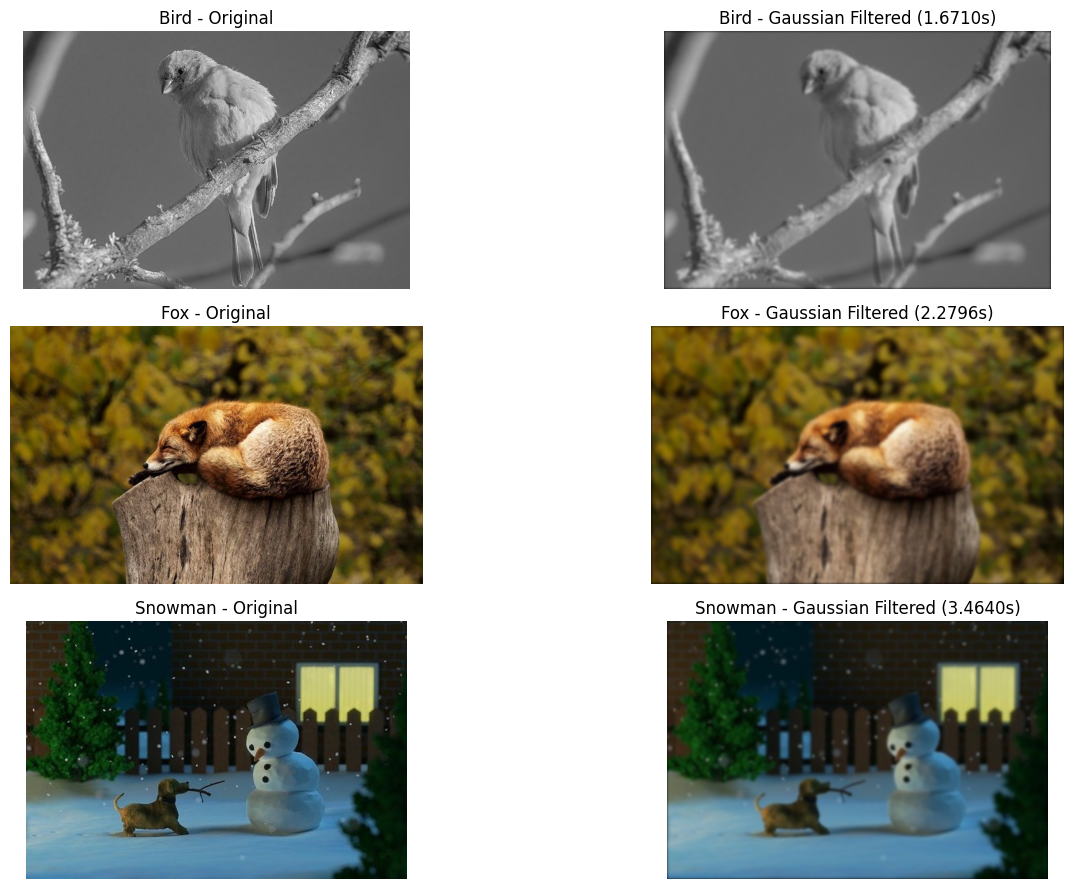

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from filter import apply_gaussian_filter_2D


image1 = cv2.imread('src/bird_clean.jpg')
image2 = cv2.imread('src/fox_clean.jpg')
image3 = cv2.imread('src/snowman_clean.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

images = [image1, image2, image3]
names = ['Bird', 'Fox', 'Snowman']
filtered_images = []
times = []

kernel_size = 13
sigma = 2.0

for idx, img in enumerate(images):
    start = time.time()
    result = apply_gaussian_filter_2D(img, kernel_size, sigma)
    elapsed = time.time() - start
    filtered_images.append(result)
    times.append(elapsed)



plt.figure(figsize=(15, 9))

for i in range(3):
    # Original
    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(images[i])
    plt.title(f"{names[i]} - Original")
    plt.axis('off')

    # Filtered
    plt.subplot(3, 2, 2*i + 2)
    plt.imshow(filtered_images[i])
    plt.title(f"{names[i]} - Gaussian Filtered ({times[i]:.4f}s)")
    plt.axis('off')

plt.tight_layout()
plt.show()


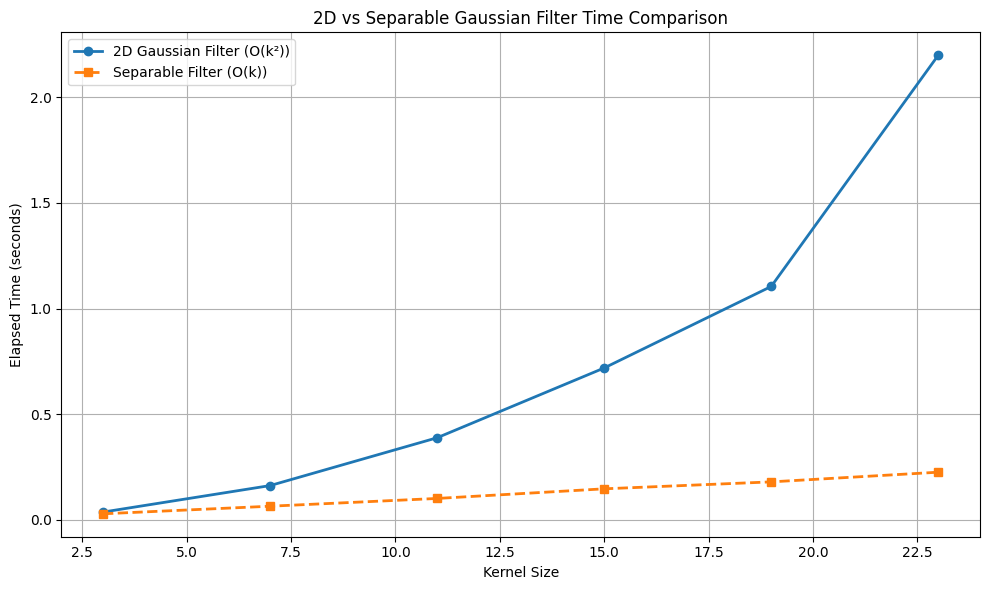

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

kernel_sizes = list(range(3,25,4))
times_2D = []
times_sep = []

# 2D 필터 시간 측정
for k in kernel_sizes:
    start = time.time()
    _ = apply_gaussian_filter_2D(image1, k, sigma)
    times_2D.append(time.time() - start)

# Separable 필터 시간 측정
for k in kernel_sizes:
    start = time.time()
    _ = apply_gaussian_filter_separable(image1, k, sigma)
    times_sep.append(time.time() - start)

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(kernel_sizes, times_2D, 'o-', label='2D Gaussian Filter (O(k²))', linewidth=2)
plt.plot(kernel_sizes, times_sep, 's--', label='Separable Filter (O(k))', linewidth=2)

plt.xlabel('Kernel Size')
plt.ylabel('Elapsed Time (seconds)')
plt.title('2D vs Separable Gaussian Filter Time Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
